In [4]:
#%matplotlib inline
#%matplotlib notebook
import numpy as np
import cv2
import matplotlib.pyplot as plt

---
#### P1Prep: Basics

---
<div class="alert alert-info">
<p>
University of Applied Sciences Munich<br>
Dept of Electrical Enineering and Information Technology<br>
Institute for Applications of Machine Learning and Intelligent Systems (IAMLIS)<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;(c) Alfred Schöttl 2023<br>
</p>
</div>

---
In this notebook, we will get to know the first basics of OpenCV.

### Instructions:
Fill out the blank sections. You may need to look up details of the OpenCV commands in the OpenCV documentation https://docs.opencv.org/master/ (which is not very comfortable to read). Generally, all OpenCV commands are included from the library `cv2`, they therefore all start with `cv2.`

Our test file. You may be interested using your own image later on. _You may need to change the directory depending on where you have downloaded the image._

In [2]:
fn = './imgs/threshold.jpg'

**1. Read in the file** (command `imread`).  
Read in the file to the variable `img` with the command `cv2.imread(<filename>, cv2.IMREAD_GRAYSCALE)`. If no image was found, the return value of `imread` is `None`. Issue a warning if the image is not available.

In [5]:
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

**2. Display the image.**  
You may use the viewer which comes with OpenCV or another library to visualize matrix values. Using the OpenCV viewer is handy for simple tasks but not always the right choice. There are e.g. OpenCV versions for embedded systems which do not include the GUI parts. Visualizing with matplotlib allows the integration in Jupyter notebooks but may require more care to adjust the display style.<br>

First use one of the options below to display our image.
- by OpenCV: commands `cv2.imshow` and `cv2.waitkey(0)`
- by matplotlib: commands `plt.imshow` and `plt.show()` 

The `waitkey` and the `show` command trigger the actual display of the figure. So make sure that these functions come after all other display commands. In Jupyter notebooks, `show` is not necessarily needed (but definitely in ordinary Python programs).

_Try both variants!_

_Tips_: 
- Your matplotlib image may be oddly colored. In this case use the `'gray'` color map to get a gray-valued image, `plt.imshow(..., cmap='gray')`.
- You may get rid of the axis markers in matplotlib by `plt.axis(False)`
- Look at the first line of this notebook. You may delete the comment before ONE of the lines `%matplotlib inline` or `%matplotlib notebook`. Try out these additional commands together with the matplotlib viewer. To activate these commands you have to restart the notebook kernel (press the >> button in the command pane of the notebook).

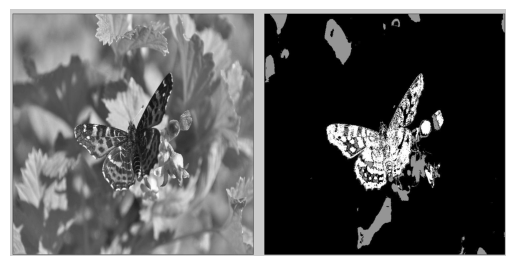

In [8]:
plt.axis(False)
plt.imshow(img, cmap='gray')

**3. Investigate and modify the image.**  
Images are stored as numpy arrays. You can use standard numpy commands. Here are some important basic operations you should be familiar with:
- Print the number of rows and columns (the _shape_, numpy `.shape` attribute) 
- Print the data type of a pixel value. (numpy `.dtype` attribute), which should be `uint8` (a Byte, 0..255) for our image.
- Print the gray value of the pixel (120, 64).
- Change the gray value of this pixel to 255.
- Change the gray value of the column 34 to 255.
- Draw a black rectangle from (130, 20) to (180, 60) in the image.
- Display the resulting image.

_Remarks_:
- Pixel coordinate indices start with 0, the first entry is the row index, the second the column index (just as with matrices).
- You may use index ranges `img[... : ..., ... : ...]` as with all numpy arrays.

(738, 1482)
uint8
112


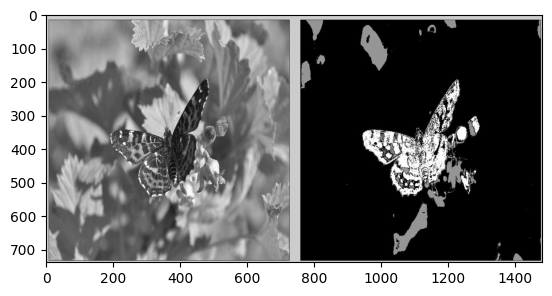

In [9]:
print(img.shape)
print(img.dtype)
print(img[120,64]) 
img[120,64] = 255
# img[120,65] = 255

plt.imshow(img, cmap='gray')

**4. Use bulk operations**  
OpenCV stores images as 2D _matrices_ (or 3D _tensors_ if colored). You may therefore perform basic matrix operations on the whole image, such as `new_img = 2*img`, `new_img = img+10` or `new_img = img1+img2`. Numpy also defines the `.max()`, `.min()` and `.avg()` methods. _You do not need any loops for the following tasks!_
- Print the maximum and the minimum value of the image.
- Display the _inverted image_ (the whitish areas shall be displayed blackish and vice versa)
- Create a modified image `img_mod` with the same content as `img` but that the maximum possible (not necessarily the maximum actual) value is 1. This operation automatically changes the pixel data type to float. Check your result by printing the maximum value of `img_mod`.

_Remark_: You can explicitly get a copy of an image with a changed data type by `img.astype(np.uint8)`or `img.astype(float)`. This is not necessary in the following tasks.

255
0


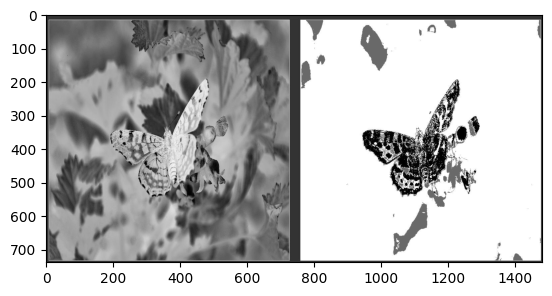

In [13]:
print(img.max())
print(img.min())
new_img = 255 - img 
plt.imshow(new_img, cmap='gray')


**5. Simplify your code by functions**  
It is very common in image processing that similar operations are needed several times or that you need to specify a lot of options difficult to remember in an OpenCV command. It can be very helpful to abbreviate these operations by a user-defined function.
- Define the function `disp_img` to display a gray-valued image by matplotlib commands. Set the appropriate color map and switch off the axis markers for a nice result. Then, try your function with our `img_mod`.
- Extend your function by an _optional_ argument `title` so that you may enter a title for the image. The matplotlib command `plt.title(...)` before `show()` allows to display a title above an image. This command shall only be executed if a title is actually entered.

_Remark_: You may notice that `imshow` also works with float-type images such as `img_mod`. `imshow` checks the data type of the image and expects values between 0..255 for uint8 images and values between 0..1 for float images.

In [3]:
def disp_img(img):

    

    


**6. Additional remarks on reading and writing images**

We use `cv2.imread` to read in images. The image data format of the file is maintained if no option is given. 


In [4]:
img = cv2.imread(fn)
print(img.shape, img.dtype)

(738, 1482, 3) uint8


The option `cv2.IMREAD_GRAYSCALE` automatically converts a colored image to grayscale during read-in. You may obtain the same result by reading in the file as colored image and apply the `cv2.cvtColor` command with `cv2.COLOR_BGR2GRAY` argument.

In [6]:
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
print(img.shape, img.dtype)
img2_colored = cv2.imread(fn)
img2 = cv2.cvtColor(img2_colored, cv2.COLOR_BGR2GRAY);
print(img2.shape, img2.dtype)

(738, 1482) uint8
(738, 1482) uint8


Observe that a standard grayscale image does not have any channel (not even one). It may sometimes be convenient to convert the image to an image with one (explicit) channel by expanding the dimensions. Conversely, we can get rid of the additional dimension by indexing the channel.

In [11]:
img_exp = np.expand_dims(img, -1)     # -1: expand dimensions at the last position
print(img_exp.shape, img_exp.dtype)
img3 = img_exp[:,:,0]                 # channel number 0 selected
print(img3.shape, img3.dtype)

(738, 1482, 1) uint8
(738, 1482) uint8


You may save your results by the `cv2.imwrite` command. The image is automatically converted to the correct file format if you specify the file name with the according file extension (use '.jpg' or '.png').

In [13]:
cv2.imwrite('result.jpg', img)

True